In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("loan_800.csv")
df

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,21966,14877,549,84,0,Female,Yes,Not Graduate,Yes,Semiurban,0
1,17725,2777,559,12,1,Male,No,Graduate,Yes,Urban,0
2,19730,12298,216,84,1,Male,Yes,Not Graduate,No,Semiurban,1
3,23602,3003,523,84,1,Male,Yes,Graduate,Yes,Urban,0
4,17377,3871,413,36,1,Female,Yes,Graduate,Yes,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...
795,10974,12213,76,36,1,Male,Yes,Graduate,No,Urban,1
796,15120,230,426,240,1,Female,No,Not Graduate,Yes,Semiurban,0
797,3904,14384,552,12,1,Female,Yes,Graduate,Yes,Rural,0
798,16884,12622,428,180,0,Male,Yes,Not Graduate,Yes,Rural,0


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i])

df

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,21966,14877,549,84,0,0,1,1,1,1,0
1,17725,2777,559,12,1,1,0,0,1,2,0
2,19730,12298,216,84,1,1,1,1,0,1,1
3,23602,3003,523,84,1,1,1,0,1,2,0
4,17377,3871,413,36,1,0,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
795,10974,12213,76,36,1,1,1,0,0,2,1
796,15120,230,426,240,1,0,0,1,1,1,0
797,3904,14384,552,12,1,0,1,0,1,0,0
798,16884,12622,428,180,0,1,1,1,1,0,0


In [4]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]
y

0      0
1      0
2      1
3      0
4      0
      ..
795    1
796    0
797    0
798    0
799    0
Name: Loan_Status, Length: 800, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area
264,5054,2387,197,180,0,0,1,0,0,0
615,12904,8645,110,84,0,0,0,1,0,2
329,12462,11271,149,36,0,1,1,0,0,2
342,12405,5060,145,12,1,1,0,1,1,0
394,8139,2553,533,12,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
71,3329,2393,161,120,1,0,0,1,0,2
106,14304,9531,262,240,1,0,0,0,0,0
270,14437,11463,482,120,0,0,1,1,1,2
435,24130,9541,585,120,1,1,1,0,1,2


In [6]:
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [7]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [8]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy_score:{accuracy*100:.2f}%")

accuracy_score:100.00%


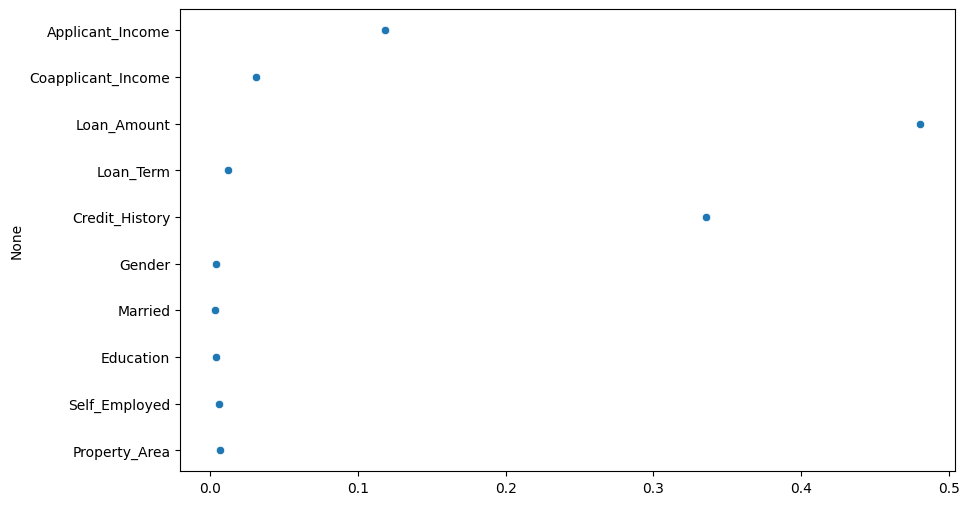

In [9]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=model.feature_importances_,y=x.columns)
plt.show()